# After sales text clustering using TF-IDF and KMeans

## Data preprocessing (Merging the translated text)

In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
from src.preprocessing.incidencias import Incidencias
from src.preprocessing.articulos import Articulos
from src.preprocessing.dataset import Dataset

# Load the data

In [2]:
# Get articulos
articulos = Articulos().get_articulos().data
# Load incidencias
incidencias = (
    Incidencias()
    .get_incidencias()
    .load_best_match("../DATA/fuzzy_matches_w_scores.csv")
    .data
)

clean_dataset = Dataset(incidencias,articulos).generate_dataset().data

C:\Users\voliveira\OneDrive - Corporacion Empresarial Altra SL\00-Proyectos\myzone\src\db\connections.py:62: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, conn)
C:\Users\voliveira\OneDrive - Corporacion Empresarial Altra SL\00-Proyectos\myzone\src\preprocessing\incidencias.py:200: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  clean_dataset.fillna("", inplace=True)
C:\Users\voliveira\OneDrive - Corporacion Empresarial Altra SL\00-Proyectos\myzone\src\preprocessing\incidencias.py:72: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change

TODO:
- [ ] Text if the clusterization is working after the code modification
- [ ] Finish this notebook with the clustering 

In [3]:
clean_dataset.sample(10)

,id,web_id,codigo,creation_date,modification_date,company_id,user_id,ref_cliente,portes_airzone,devaluacion,...,DESCART,CAR1,CAR2,CAR3,CAR4,DESCCAR1,DESCCAR2,DESCCAR3,DESCCAR4,text_to_analyse
10668,17931,2,BGRRZGHV52,2019-10-01 07:53:46,2020-05-27 06:45:29,226,333.0,SAV,1,0,...,Termostato radio monocromo Airzone Think blanc...,1,250,91,2,SISTEMAS DE ZONAS,FLEXA (CE6),TERMOSTATOS,THINK,SAV PENSAR EN LA RADIO SAV
14562,24540,1,LWVUNGLW91,2020-11-26 15:47:04,2021-01-12 06:53:11,1534,1900.0,Ferro6CCP,1,0,...,Central de control de producción Airzone,1,260,92,None,SISTEMAS DE ZONAS,COMUNES,CONTROLADORES CENTRALIZADOS,NaN,"Como nos indica Rafael Gerena, en una vivienda..."
34609,56225,1,L2ZSZMLJ44,2024-02-21 11:53:46,2024-03-08 09:32:47,31,73.0,marina salamanca,1,0,...,Termostato cable Airzone Blueface Zero blanco ...,1,250,91,1,SISTEMAS DE ZONAS,FLEXA (CE6),TERMOSTATOS,BLUEFACE,no comunica TERMOSTATO AZUL no comunica
33517,54154,1,N2NQZWZH98,2024-01-02 10:46:34,2024-01-15 15:33:12,67,118.0,SDC24000002SDV24000002,1,0,...,Módulo zona cable Airzone ud.fancoil individua...,1,251,95,None,SISTEMAS DE ZONAS,ACUAZONE (DI6),MODULOS DE ZONA,NaN,LÍNEA CALIENTE: 231203174 CABLE MÓDULO ZONA AI...
11252,19010,1,BMZQAGNUC3,2019-11-28 09:05:07,2019-12-13 13:00:18,130,1316.0,159,1,0,...,Modulo zona cable Airzone ud.fancoil indv. 3ve...,1,251,95,None,SISTEMAS DE ZONAS,ACUAZONE (DI6),MODULOS DE ZONA,NaN,HARÍA AIRZONE MODULO PASARELA FANCOIL 32Z HARÍA
13362,22673,1,MGPUMMTN1F,2020-08-25 09:51:07,2020-09-04 06:58:35,316,436.0,164/20,1,0,...,Central de sistema Airzone Flexa 3.0 6Z,1,250,90,None,SISTEMAS DE ZONAS,FLEXA (CE6),CENTRALES,NaN,"la centralita no funciona con el blueface, pon..."
24654,39753,2,A2XGZMGCEF,2022-09-29 12:33:06,2022-12-07 15:32:54,363,504.0,STech258894,1,0,...,Pasarela controlador Airzone-Daikin Sky Air/VRV,1,260,49,None,SISTEMAS DE ZONAS,COMUNES,PASARELAS,NaN,STech258894\r\nBOLETO 69029\r\n\r\nPROBLEMA DE...
12907,22001,2,LMVUL25WF1,2020-07-15 08:55:38,2021-01-26 13:34:30,301,3656.0,N°6327-CF184199+CC695036-SAV-CLIM ET FROID 34,1,0,...,Termostato cable a color Airzone Blueface blan...,1,250,91,1,SISTEMAS DE ZONAS,FLEXA (CE6),TERMOSTATOS,BLUEFACE,EXPEDIENTE 6327 TERMOSTATO IBPRO6 INTELIGENTE ...
8343,13366,2,NW2CM5RRFD,2018-12-17 09:11:58,2019-06-04 06:27:37,358,493.0,BARIERRA,1,0,...,Termostato cable a color Airzone Blueface blan...,1,250,91,1,SISTEMAS DE ZONAS,FLEXA (CE6),TERMOSTATOS,BLUEFACE,"El control remoto ya no responde, planeo cambi..."
6661,10236,1,NGICMPVU38,2018-06-19 13:16:15,2018-06-25 14:04:41,494,145.0,ASISTENCIA SAN ANTOLIN- ESOLMUR,1,0,...,Termostato radio monocromo Airzone Think blanc...,1,250,91,2,SISTEMAS DE ZONAS,FLEXA (CE6),TERMOSTATOS,THINK,TERMOSTATO THINK ESTA SUELTO EL FRONTAL DE CRI...


In [10]:
# Get only the columns with the fields of interest
text_to_analyse = clean_dataset[
    [
        "desc_problema_translated",
        "descripcion_translated",
        "problema_translated",
        "cod_articulo",
        "text_to_analyse"
    ]
]
# Fill NA with empty string
text_to_analyse.fillna("", inplace=True)

C:\Users\voliveira\AppData\Local\Temp\ipykernel_16304\792743592.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_to_analyse.fillna("", inplace=True)


In [9]:
text_to_analyse.loc[:, "text_to_analyse"] = (
    text_to_analyse["desc_problema_translated"]
    + " "
    + text_to_analyse["descripcion_translated"]
    + " "
    + text_to_analyse["problema_translated"]
    + " "
    + text_to_analyse["cod_articulo"]
)

KeyError: 'desc_problema_translated'

In [6]:
# Clean rows with less than 25 characters
text_to_analyse = text_to_analyse[text_to_analyse["text_to_analyse"].str.len() > 25]
# Clean rows with only NO FUNCIONA in text_to_analyse
text_to_analyse = text_to_analyse[
    text_to_analyse["text_to_analyse"].str.replace("NO FUNCIONA", "").str.len() > 25
]

In [7]:
text_to_analyse.head(10)

,desc_problema_translated,descripcion_translated,problema_translated,cod_articulo,text_to_analyse
0,INDICAN EXCLUSIVAMENTE QUE SE HA ESTROPEADO LA...,MODULO ALARMAS TECNICAS,INDICAN SE HA ESTROPEADO EN LA INSTALACION Y ...,MATS,INDICAN EXCLUSIVAMENTE QUE SE HA ESTROPEADO LA...
2,AZATACTORSB SE HA QUEDADO BLOQUEADO. NO PERMIT...,,TACTO BLOQUEADO. NO ENCIENDE-APAGA NI DEJA CAM...,AZATACTORSB,AZATACTORSB SE HA QUEDADO BLOQUEADO. NO PERMIT...
3,DESDE PULSADORES NO SE PUEDE SUBIR LA PERSIANA...,MODELO 2 PERSIANAS,UNA DE LAS 2 PERSIANAS NO FUNCIONA CON PULSADO...,PER2,DESDE PULSADORES NO SE PUEDE SUBIR LA PERSIANA...
4,"REJILLA MOTORIZADA DEFECTUOSA, SUSTITUIR",,Rafael el viernes llego mi pedido nº 23349 pa...,RINT040015BKMTE,"REJILLA MOTORIZADA DEFECTUOSA, SUSTITUIR Rafa..."
5,MODULO DE FANCOIL DA PROBLEMAS LAS COMUNICACI...,AZAMFANCOILC,MODULO DE FANCOIL DE ZONA 32Z,AZAMFANCOILC,MODULO DE FANCOIL DA PROBLEMAS LAS COMUNICACI...
6,MODULO DE FANCOIL NO SACA 7V POR EL BUS EN VEZ...,MODULO DE FANCOIL DE ZONA 32Z,"SE DETECTA QUE EL BLUEFACE AL ENCENDERLO, SE Q...",AZAMFANCOILC,MODULO DE FANCOIL NO SACA 7V POR EL BUS EN VEZ...
7,"Error al pedir la pasarela, a última hora hubo...",Pasarela Mitsubishi Heavy,"Error comercial, por cambio de última hora en ...",AZXEQADAPMHI,"Error al pedir la pasarela, a última hora hubo..."
8,SE HAN CAMBIADO LAS TAPAS TRASERAS VARIAS VECE...,,SE ROMPEN TAPAS TRASERAS. CAMBIAR TERMOSTATO.,AZC3BLUEFECOSB,SE HAN CAMBIADO LAS TAPAS TRASERAS VARIAS VECE...
9,SE HAN CAMBIADO LAS TAPAS TRASERAS VARIAS VECE...,,5 UNIDADES. SE ROMPEN TAPAS TRASERAS.,AZC3TACTOCSB,SE HAN CAMBIADO LAS TAPAS TRASERAS VARIAS VECE...
10,SE HAN ROTO LAS TAPAS TRASERAS EN MAS DE UNA O...,,2 UNIDADES. TAPAS TRASERAS ROTAS EN VARIAS OCA...,AZC3BLUEFECOSB,SE HAN ROTO LAS TAPAS TRASERAS EN MAS DE UNA O...


## Apply TF-IDF and KMeans clustering

In [15]:
import nltk
from nltk.corpus import stopwords
from string import punctuation
from src.preprocessing.utils import pre_process_text_nltk

# Download the stopwords and punkt
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\voliveira\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\voliveira\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\voliveira\AppData\Roaming\nltk_data...


True

In [16]:
example_text = "Hola, esto es un ejemplo de texto que vamos a preprocesar para testear"


# Create wrapper function
def pre_process_text(text):
    return pre_process_text_nltk(
        text=text,
        lower_case=True,
        stop_words=stopwords.words("spanish"),
        punctuation=punctuation,
        lemma=nltk.stem.WordNetLemmatizer(),
    )


# Test the function
pre_process_text(example_text)

'hola ejemplo texto vamos preprocesar testear'

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    lowercase=False, preprocessor=pre_process_text, min_df=0.01, max_df=0.99
)

vector = vectorizer.fit_transform(text_to_analyse["text_to_analyse"])
vector = pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names_out())

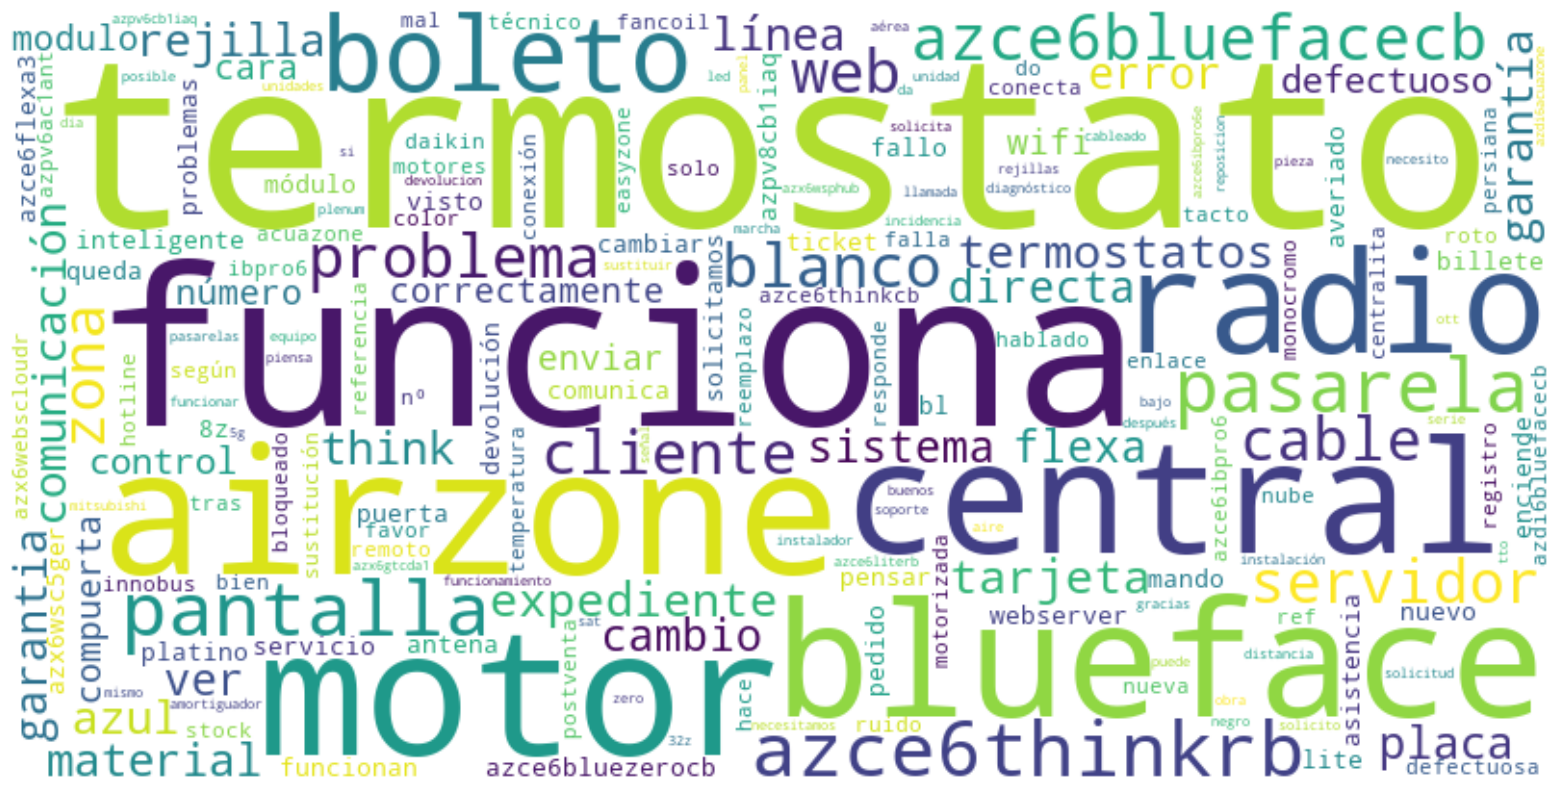

In [19]:
# Create a cloud of words with the most common words
from wordcloud import WordCloud

wordcloud = WordCloud(
    width=800, height=400, background_color="white"
).generate_from_frequencies(vector.sum().to_dict())
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

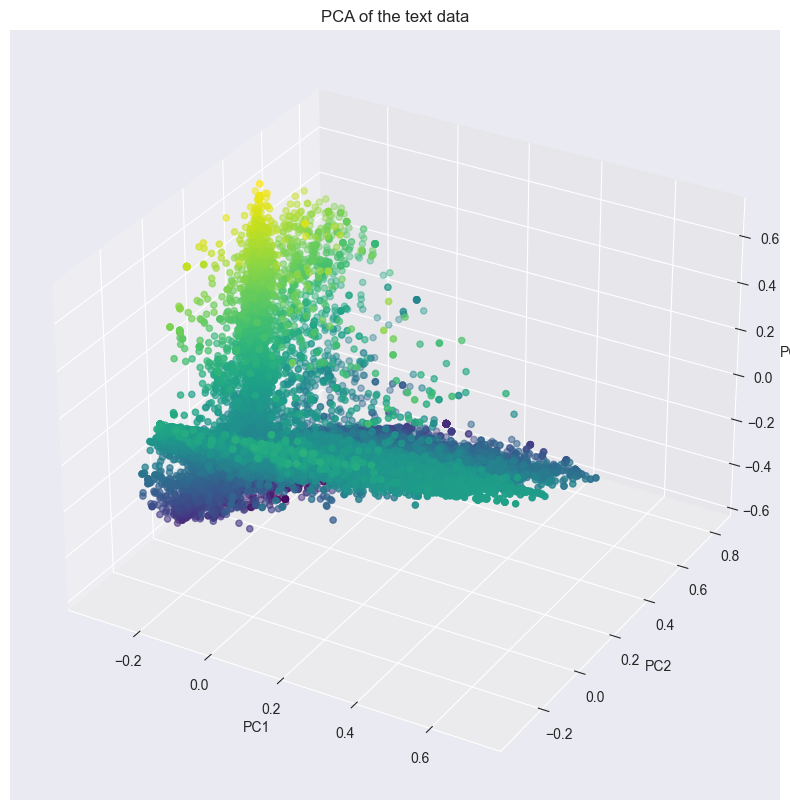

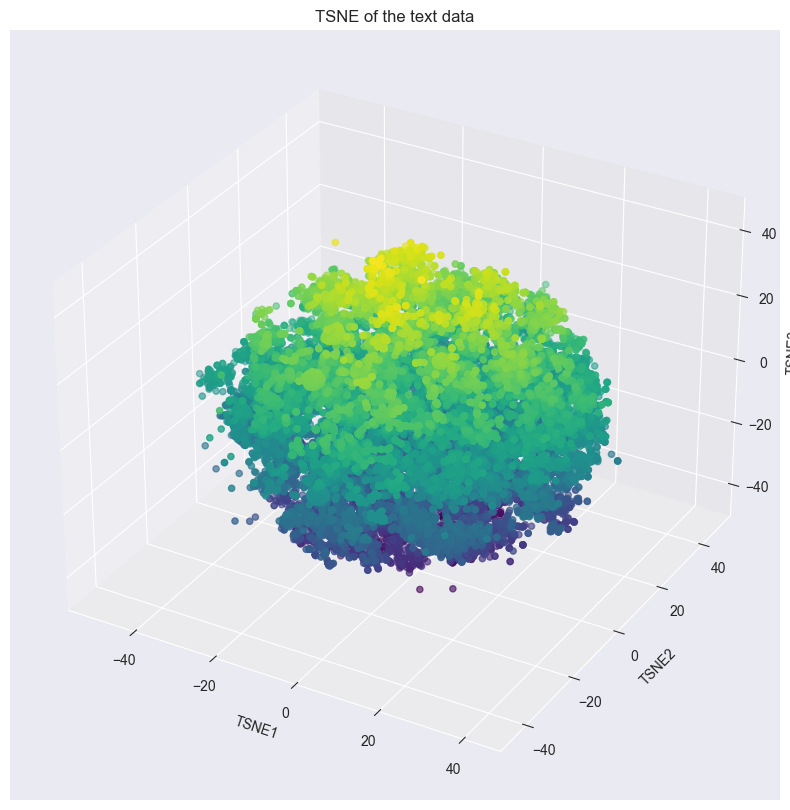

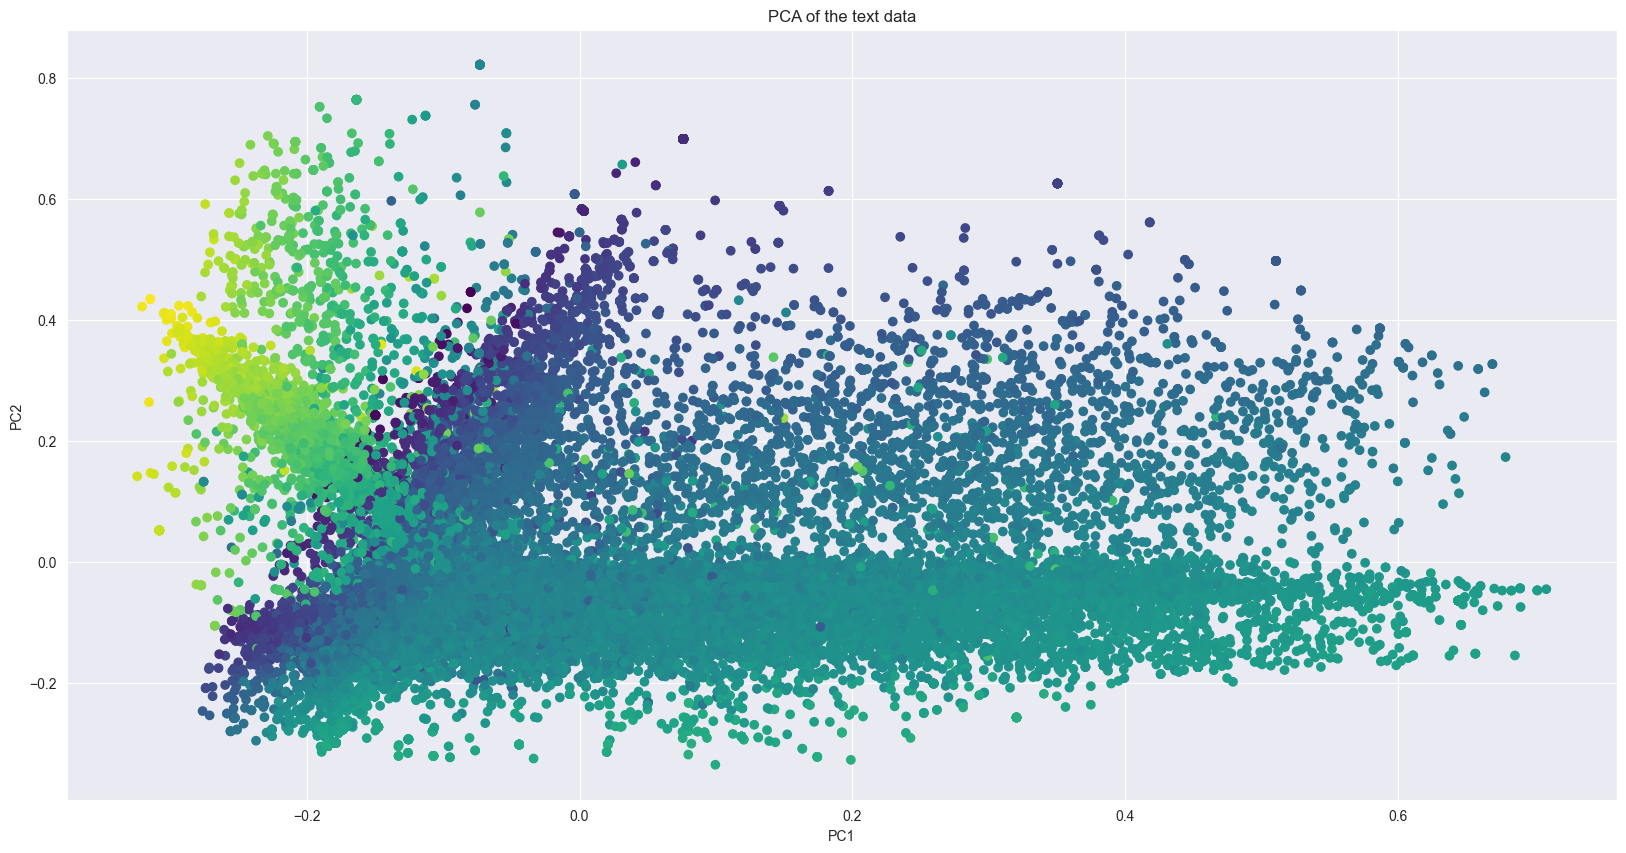

In [26]:
# Use PCA to reduce the dimensionality of the data
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_vector = pca.fit_transform(vector)
pca_vector = pd.DataFrame(pca_vector, columns=["PC1", "PC2", "PC3"])

plt.figure(figsize=(20, 10))
plt.scatter(pca_vector["PC1"], pca_vector["PC2"], c=pca_vector["PC3"], cmap="viridis")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of the text data")
plt.show()

In [27]:
# Plotting in 3D
%matplotlib qt
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    pca_vector["PC1"],
    pca_vector["PC2"],
    pca_vector["PC3"],
    c=pca_vector["PC3"],
    cmap="viridis",
)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.title("PCA of the text data")
plt.show()

In [22]:
%matplotlib inline

In [23]:
# Use another dimensionality reduction technique
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3)
tsne_vector = tsne.fit_transform(vector)
tsne_vector = pd.DataFrame(tsne_vector, columns=["TSNE1", "TSNE2", "TSNE3"])

In [28]:
%matplotlib qt
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    tsne_vector["TSNE1"],
    tsne_vector["TSNE2"],
    tsne_vector["TSNE3"],
    c=tsne_vector["TSNE3"],
    cmap="viridis",
)
ax.set_xlabel("TSNE1")
ax.set_ylabel("TSNE2")
ax.set_zlabel("TSNE3")
plt.title("TSNE of the text data")
plt.show()

In [25]:
%matplotlib inline

In [53]:
import string


class PreProcessText:
    def __init__(
        self,
        lower_case=True,
        stop_words=None,
        punctuation=None,
        lemma=None,
        stemmer=None,
        min_df=0.01,
        max_df=0.99,
    ):
        self.lower_case = lower_case
        self.stop_words = stop_words
        self.punctuation = punctuation
        self.lemma = lemma
        self.stemmer = stemmer
        self.min_df = min_df
        self.max_df = max_df
        self.vectorizer = None

    def pre_process_text_nltk_wrapper(self, text):
        return pre_process_text_nltk(
            text,
            lower_case=self.lower_case,
            stop_words=self.stop_words,
            punctuation=self.punctuation,
            lemma=self.lemma,
            stemmer=self.stemmer,
        )

    def fit(self, X, y=None):
        self.vectorizer = TfidfVectorizer(
            lowercase=False,
            preprocessor=self.pre_process_text_nltk_wrapper,
            min_df=self.min_df,
            max_df=self.max_df,
        )
        self.vectorizer.fit(X)
        return self

    def transform(self, X, y=None):
        return self.vectorizer.transform(X)

    def get_params(self, deep=True):
        return {
            "lower_case": self.lower_case,
            "stop_words": self.stop_words,
            "punctuation": self.punctuation,
            "lemma": self.lemma,
            "stemmer": self.stemmer,
            "min_df": self.min_df,
            "max_df": self.max_df,
        }

    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        return self


stop_words = set(stopwords.words("english"))
punctuation_set = set(string.punctuation)
lemma = nltk.stem.WordNetLemmatizer()
stemmer = nltk.stem.SnowballStemmer("spanish")

In [64]:
# Create a sklearn pipeline to apply a clustering algorithm
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
import mlflow

mlflow.set_tracking_uri("http://localhost:5000")
from sklearn.metrics import make_scorer, silhouette_score

mlflow.set_experiment("NLP Clustering Experiment")

# Create the pipeline
pipeline = Pipeline(
    [
        (
            "preprocess",
            PreProcessText(),
        ),  # Note: Use default init, params will be passed by GridSearchCV
        ("kmeans", KMeans()),
    ]
)

# Create grid search parameters
# Define parameter grid
parameters = {
    "preprocess__stop_words": [stop_words, None],
    #'preprocess__punctuation': [punctuation_set, None],
    #'preprocess__lemma': [lemma, None],
    #'preprocess__min_df': [0.01, 0.05],
    #'preprocess__max_df': [0.95, 0.99],
    "kmeans__n_clusters": [250],
}


def custom_grid_search(
    pipeline, parameters, X, scoring=None, cv=2, n_jobs=-1, verbose=1
):

    grid_search = GridSearchCV(
        pipeline, parameters, cv=cv, n_jobs=n_jobs, verbose=verbose
    )

    grid_search.fit(X)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_estimator = grid_search.best_estimator_

    return best_params, best_score, best_estimator


def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    score = silhouette_score(X, labels)
    return score


with mlflow.start_run():

    best_params, best_score, best_estimator = custom_grid_search(
        pipeline, parameters, text_to_analyse["text_to_analyse"]
    )

    # Log the best parameters and score
    mlflow.log_params(best_params)
    mlflow.log_metric("best_score", best_score)

    # Log the best model
    mlflow.sklearn.log_model(best_estimator, "best_model")

    print("Best parameters:", best_params)
    print("Best score:", best_score)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
Best parameters: {'kmeans__n_clusters': 250, 'preprocess__stop_words': {'again', "isn't", 'wouldn', 'an', 'what', 'do', 'up', 'such', 'doesn', 'until', 't', "she's", 'those', 'there', 'himself', 'yourselves', 'against', 'needn', 'other', 'hasn', 'both', 'herself', 'its', 'were', 'his', 'off', 'between', 'each', 'than', 'hers', 'who', 'does', 'under', "mightn't", 'was', 'further', "wouldn't", 'not', 'i', 'had', 'so', 'ours', 'yourself', 'own', 'didn', 'through', 'same', 'your', 'some', 'should', 'themselves', 'now', 'while', 'be', 'she', 'hadn', 'too', 'if', 'him', 'just', 'll', 'ourselves', 'how', 'mightn', 'in', 'has', "mustn't", 'isn', 'at', "don't", 'the', 'no', 'once', 'our', 'any', 'are', 'won', 'y', 'will', 'for', 'whom', 'all', 'above', 'here', "weren't", 'yours', 'when', 'over', 'these', 'during', 'can', 'you', "hasn't", 'itself', "that'll", 'mustn', "you're", "won't", 'we', 'doing', 'then', 's', 'haven', "you've", "had

In [62]:
# Add the cluster to the dataset
text_to_analyse["cluster"] = best_estimator.predict(text_to_analyse["text_to_analyse"])

C:\Users\voliveira\AppData\Local\Temp\ipykernel_2716\851296156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_to_analyse['cluster'] = best_estimator.predict(text_to_analyse['text_to_analyse'])


In [57]:
# Plot the clusters
%matplotlib qt

# Plotting code
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    pca_vector["PC1"],
    pca_vector["PC2"],
    pca_vector["PC3"],
    c=text_to_analyse["cluster"],
    cmap="viridis",
)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.title("PCA of the text data")
plt.show()

In [58]:
# Plot the clusters
%matplotlib qt

# Plotting code
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    tsne_vector["TSNE1"],
    tsne_vector["TSNE2"],
    tsne_vector["TSNE3"],
    c=text_to_analyse["cluster"],
    cmap="viridis",
)
ax.set_xlabel("TSNE1")
ax.set_ylabel("TSNE2")
ax.set_zlabel("TSNE3")
plt.title("After sales text clustering")
plt.show()

In [52]:
%matplotlib inline

In [34]:
text_to_analyse.head(10)

,desc_problema_translated,descripcion_translated,problema_translated,cod_articulo,text_to_analyse,cluster
0,INDICAN EXCLUSIVAMENTE QUE SE HA ESTROPEADO LA...,MODULO ALARMAS TECNICAS,INDICAN SE HA ESTROPEADO EN LA INSTALACION Y ...,MATS,INDICAN EXCLUSIVAMENTE QUE SE HA ESTROPEADO LA...,136
1,NO FUNCIONA,,NO FUNCIONA,AZC3TACTOCSB,NO FUNCIONA NO FUNCIONA AZC3TACTOCSB,53
2,AZATACTORSB SE HA QUEDADO BLOQUEADO. NO PERMIT...,,TACTO BLOQUEADO. NO ENCIENDE-APAGA NI DEJA CAM...,AZATACTORSB,AZATACTORSB SE HA QUEDADO BLOQUEADO. NO PERMIT...,151
3,DESDE PULSADORES NO SE PUEDE SUBIR LA PERSIANA...,MODELO 2 PERSIANAS,UNA DE LAS 2 PERSIANAS NO FUNCIONA CON PULSADO...,PER2,DESDE PULSADORES NO SE PUEDE SUBIR LA PERSIANA...,197
4,"REJILLA MOTORIZADA DEFECTUOSA, SUSTITUIR",,Rafael el viernes llego mi pedido nº 23349 pa...,RINT040015BKMTE,"REJILLA MOTORIZADA DEFECTUOSA, SUSTITUIR Rafa...",125
5,MODULO DE FANCOIL DA PROBLEMAS LAS COMUNICACI...,AZAMFANCOILC,MODULO DE FANCOIL DE ZONA 32Z,AZAMFANCOILC,MODULO DE FANCOIL DA PROBLEMAS LAS COMUNICACI...,28
6,MODULO DE FANCOIL NO SACA 7V POR EL BUS EN VEZ...,MODULO DE FANCOIL DE ZONA 32Z,"SE DETECTA QUE EL BLUEFACE AL ENCENDERLO, SE Q...",AZAMFANCOILC,MODULO DE FANCOIL NO SACA 7V POR EL BUS EN VEZ...,83
7,"Error al pedir la pasarela, a última hora hubo...",Pasarela Mitsubishi Heavy,"Error comercial, por cambio de última hora en ...",AZXEQADAPMHI,"Error al pedir la pasarela, a última hora hubo...",179
8,SE HAN CAMBIADO LAS TAPAS TRASERAS VARIAS VECE...,,SE ROMPEN TAPAS TRASERAS. CAMBIAR TERMOSTATO.,AZC3BLUEFECOSB,SE HAN CAMBIADO LAS TAPAS TRASERAS VARIAS VECE...,12
9,SE HAN CAMBIADO LAS TAPAS TRASERAS VARIAS VECE...,,5 UNIDADES. SE ROMPEN TAPAS TRASERAS.,AZC3TACTOCSB,SE HAN CAMBIADO LAS TAPAS TRASERAS VARIAS VECE...,12


In [35]:
text_to_analyse[text_to_analyse["cluster"] == 1]["problema_translated"]

519                               REPONER TERMOSTATO NUEVO
622      El termostato tiene una falla en la pantalla (...
623      El termostato tiene una falla en la pantalla (...
997      Sale una raya en medio de la pantalla, por fav...
1803     Termostato que ha perdido el color y se ve bor...
                               ...                        
34186    Problema de visualización en la pantalla a pes...
34441                                            1 UNIDAD.
34933    Buenos dias,\r\nLa pantalla no funciona, el te...
34983                                                     
35064                                  termostato atascado
Name: problema_translated, Length: 138, dtype: object

In [36]:
# Create a temporary column 'temp_index' to assign a unique row identifier within each cluster
text_to_analyse["temp_index"] = text_to_analyse.groupby("cluster").cumcount()

# Pivot the DataFrame
pivoted_df = text_to_analyse.pivot(
    index="temp_index", columns="cluster", values="text_to_analyse"
)

# Optionally, if you don't want the multi-level index that comes from pivoting
pivoted_df.columns = [f"Cluster_{int(col)}" for col in pivoted_df.columns]

# Drop the index if it is irrelevant
pivoted_df.reset_index(drop=True, inplace=True)

C:\Users\voliveira\AppData\Local\Temp\ipykernel_2716\1497843397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_to_analyse['temp_index'] = text_to_analyse.groupby('cluster').cumcount()


In [37]:
pivoted_df.head(50)

,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9,...,Cluster_190,Cluster_191,Cluster_192,Cluster_193,Cluster_194,Cluster_195,Cluster_196,Cluster_197,Cluster_198,Cluster_199
0,Mal contacto a nivel de conexión entre la plac...,TERMOSTATO BLUEFACE APARACE RAYA EN PANTALLA Y...,AZX6WSC5GER de zona aérea\r\nNúmero de expedie...,DEVOLUCION DE CENTRAL DE SISTEMA DEFECTUOSA CE...,NO FUNCIONA MOTOR DE UNA DE LAS SALIDAS DE UN...,La puerta de enlace AZXEQADAPTO2I está defectu...,PERDIDA DE VINCULACION CON ROUTER AUN ESTANDO ...,MATERIALES PARA DEMOSTRACIÓN Y EXHIBICIÓN\r\nM...,Think radio se queda la pantalla congelada y p...,VER CONVOCATORIA 16382 Xxxxxxx Hs Azeb6bluefaceb,...,No funciona correctamente y le da error el sis...,"Entrega en 0 acuerdo Frédéric DESCOURS, MONTAR...","Termostato inteligente Blueface Cen Blanco, NO...",En nuestro pedido 5600725 con el numero d? AR ...,NECESITO 15 TAPAS TRASERAS BLANCAS PARA INSTAL...,BLUEFACE (AZCE6) SE RETRASA LA HORA OTT. CARA ...,Problema de comunicación en uno de los mandos ...,DESDE PULSADORES NO SE PUEDE SUBIR LA PERSIANA...,"El termostato funciona irregularmente, a menud...",EMISIÓN DE ONDA WIFI MUY DÉBIL Y NO PERMITE CO...
1,Hace mal contacto. Si lo aprietas con las mano...,Tras la sustitución del sistema - en el moment...,Referencia de garantía del servidor web azx6ws...,NO FUNCIONA CENTRAL DE SISTEMA ACUAZONE 32Z NO...,MATERIALES PARA DEMOSTRACIÓN Y EXHIBICIÓN\r\nM...,Reemplazo del servicio posventa No. CM1OBPLJA4...,No funciona CTROLAD.BLUEFACE FLEXA 2.0/CEN EMP...,Rango de reserva de existencias 2016\r\n\r\n>>...,la pantalla no cambia cuando cambias de funció...,VER CONVOCATORIA 16382 XXXXX X XXXX,...,"LA CCP NO LEE EL SISTEMA, SE MIDE ENTRE - Y AZ...","Entrega en 0 acuerdo Frédéric DESCOURS, MONTAR...","Producto AZD defectuoso, por lo tanto, reemplá...",En nuestro pedido 5600725 con el numero d? AR ...,NECESITO 2 BASES Y 1 SONDA RF: AZCE6LITECB OTT...,TERMOSTATOS NO FUNCIONA TACTIL OTT. CARA AZUL ...,10 soportes para mandos a distancia rotos Sopo...,"ASISTENCIA A OBRA, EN LA PUESTA EN MARCHA NO C...","EL MODULO WIFI NO FUNCIONA, NO HACE NADA. NO E...","PASARELA DE CONEXIÓN HS SS GARANTIZADA, ref AZ..."
2,mal producto motor para compuerta motorizada m...,Tras la sustitución del sistema - en el moment...,WS QUI SE DESCONECTAR SERVIDOR WEB WIFI SERVID...,2 MODULOS DE FANCOIL Y CENTRAL ACUAZONE NO FUN...,EL MOTOR CIERRA LA REJA PERO NO LA ABRE. EL CL...,Reemplazo de puerta de enlace Daikin Pasarela ...,"AVERIA SALIDA 1 DE DIM4, LAS LUCES SE QUEDAN F...",Para probar en ME FRP71 TERMOSTATO IBPRO6 INTE...,DOS TERMOSTATOS THINK RADIO BLANCO QUE SALE LA...,ver con remolino placa central ver eddy aunett...,...,En una obra con 30 sistemas basic servida al c...,PÉRDIDA DE COMUNICACIÓN EXPEDIENTE 7442 CPCC ...,"Producto AZD defectuoso, por lo tanto, reemplá...",En nuestro pedido 5600725 con el numero d? AR ...,Falla 1 pasarela LG del Flexa 2.0 y el BLUEFA...,TERMOSTATOS NO FUNCIONA TACTIL OTT. CARA AZUL ...,una tarjeta HS y control remoto durante la pue...,"ASISTENCIA A OBRA TORRE TRIANA VISITA CON I+D,...","modulo no funciona, no manda señal MÓDULO MODU...",Pérdida de conexión regular entre el radioterm...
3,PEDIDO MAL REFERENCIA AL PEDIR EL MATERIAL NO...,"Termostato BLUEFACE AZC3BLUEFACECOSB, sale una...","WEBSERBER AVERIADO, CAMBIO POR SERVIDOR WIFI A...",2 uds Central Acuazone 32z (ref.AZDI6ACUAZONE)...,"MOTOR DE RINT, NO FUNCIONA. \r\n\r\nLO CAMBIO ...",Problema con la puerta de enlace wifi “HS” pro...,TRAS ESTAR FUNCIONANDO CORRECTAMENTE DURANTE U...,* Equipo perdido en la cámara de demostración ...,DOS TERMOSTATOS THINK RADIO BLANCO QUE SALE LA...,ver con remolino thermostat tacto ver eddy aun...,...,"""Módulo de zonificación 32Z cable"" no da salid...",expediente 10015 carta expediente 10015 AZCE6I...,TERMOSTATO BLUEFACE CON LÍNEA HORIZONTAL EN LA...,En nuestro pedido 5600725 con el numero d? AR ...,BASES DE TERMOSTATOS X NECESITO SE

In [38]:
clean_dataset.head()

,id,web_id,codigo,creation_date,modification_date,company_id,user_id,ref_cliente,portes_airzone,devaluacion,...,titulo_pt,id_tipo,titulo_es_tipo,titulo_en_tipo,titulo_fr_tipo,titulo_it_tipo,titulo_pt_tipo,desc_problema_translated,descripcion_translated,problema_translated
0,49,1,YZ2YZZUU16,2015-04-27 09:32:18,2015-05-28 06:55:45,498,128.0,CENTRAL ALARMAS,1,0,...,,1.0,garantia,guarantee,garantie,garanzia,,INDICAN EXCLUSIVAMENTE QUE SE HA ESTROPEADO LA...,MODULO ALARMAS TECNICAS,INDICAN SE HA ESTROPEADO EN LA INSTALACION Y ...
1,5,1,Y52FA5OT97,2015-03-10 17:49:28,2015-04-16 16:51:24,26,67.0,21406866,1,0,...,,1.0,garantia,guarantee,garantie,garanzia,,NO FUNCIONA,,NO FUNCIONA
2,50,1,ZP2CZZYVBD,2015-04-27 09:51:49,2015-06-03 09:09:08,499,117.0,SPLITMANIA JEREZ-ANTONIO GARCIA PADILLA,1,0,...,,1.0,garantia,guarantee,garantie,garanzia,,AZATACTORSB SE HA QUEDADO BLOQUEADO. NO PERMIT...,,TACTO BLOQUEADO. NO ENCIENDE-APAGA NI DEJA CAM...
3,46,1,YPUEA5WZ10,2015-04-20 14:44:57,2015-05-28 06:21:09,498,128.0,REPARACION MODULO PERSIANA,1,0,...,,1.0,garantia,guarantee,garantie,garanzia,,DESDE PULSADORES NO SE PUEDE SUBIR LA PERSIANA...,MODELO 2 PERSIANAS,UNA DE LAS 2 PERSIANAS NO FUNCIONA CON PULSADO...
4,51,1,ZPWBA5ETF7,2015-04-27 14:49:58,2015-05-13 16:33:58,497,135.0,"REJILLA DE JESUS VELASCO, SPLITMANIA HUELVA",1,0,...,,1.0,garantia,guarantee,garantie,garanzia,,"REJILLA MOTORIZADA DEFECTUOSA, SUSTITUIR",,Rafael el viernes llego mi pedido nº 23349 pa...


In [39]:
clean_dataset.groupby(["cod_articulo"]).size().sort_values(ascending=False)

cod_articulo
AZCE6BLUEFACECB     2910
AZCE6THINKRB        2654
AZCE6FLEXA3          850
AZCE6BLUEZEROCB      783
AZX6WSC5GER          702
                    ... 
AZX6QADAPT3HI2         1
37714                  1
AZX6QADAPT3GR2+A       1
37755                  1
à définir              1
Length: 5944, dtype: int64

In [66]:
# Save clean dataset in desktop and wrap the strings into aspas
clean_dataset.to_csv(
    "C:/Users/voliveira/Desktop/clean_dataset.csv", index=False, quoting=1
)